In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [5]:
df.isnull().sum().sum()

np.int64(2563)

In [6]:
df.duplicated().sum()

np.int64(0)

**Now removing null values**
1. Numerical value- mean
2. categorical value- mode

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
for x in df.columns:
  if df[x].dtype=='object' :
    df[x].fillna(df[x].mode()[0],inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)

/tmp/ipython-input-824418490.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)
/tmp/ipython-input-824418490.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [9]:
# Checking whether null values have replaced or not
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [10]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


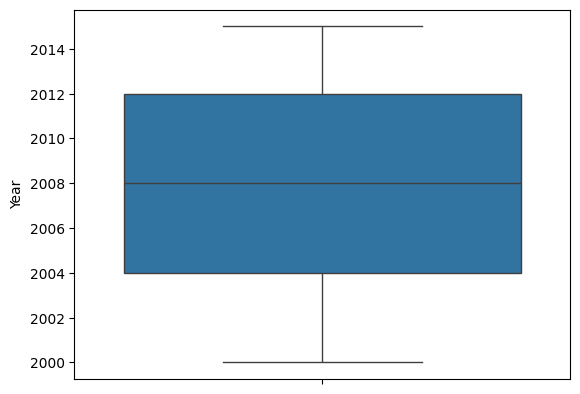

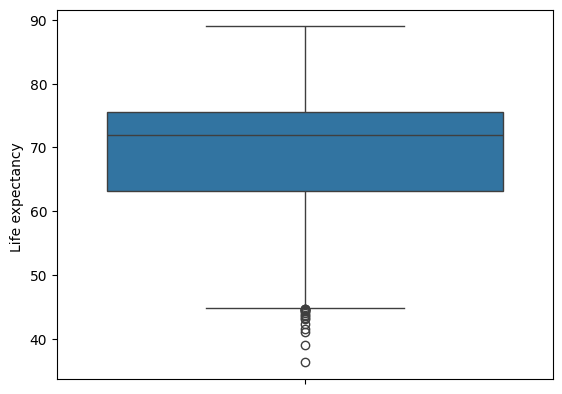

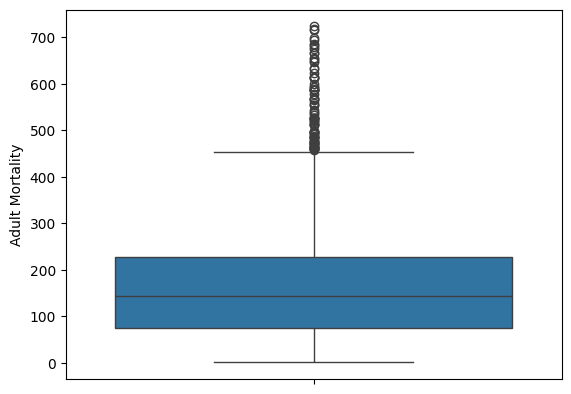

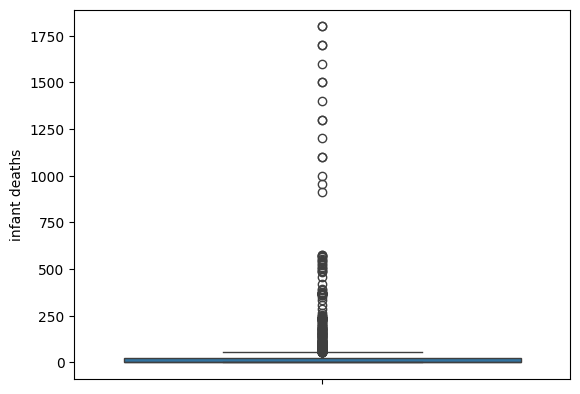

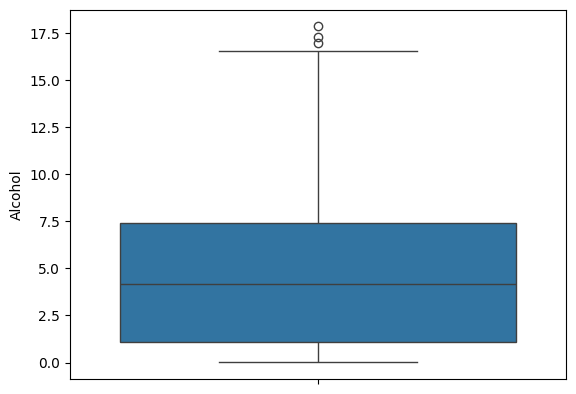

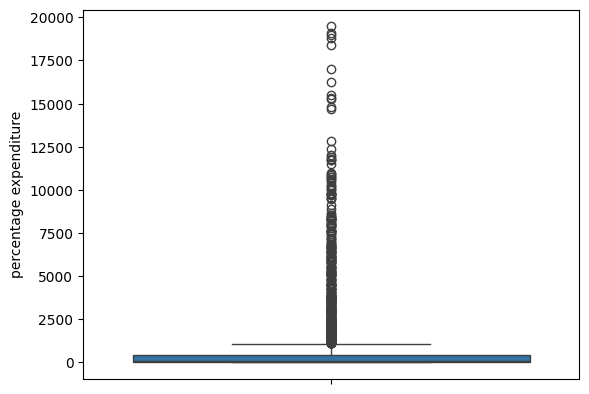

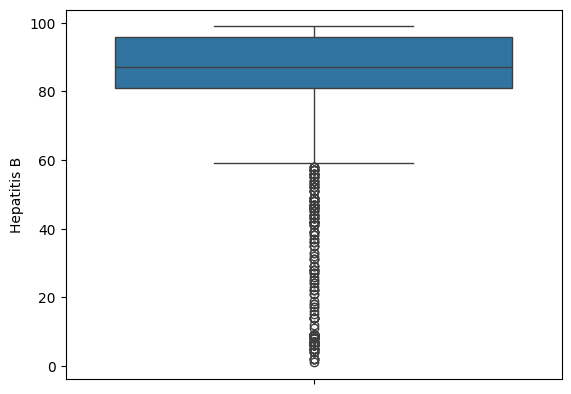

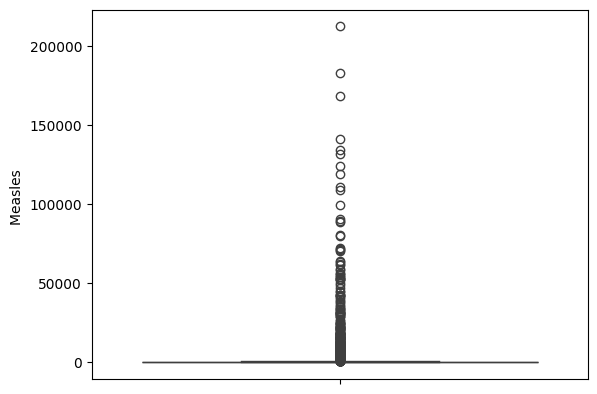

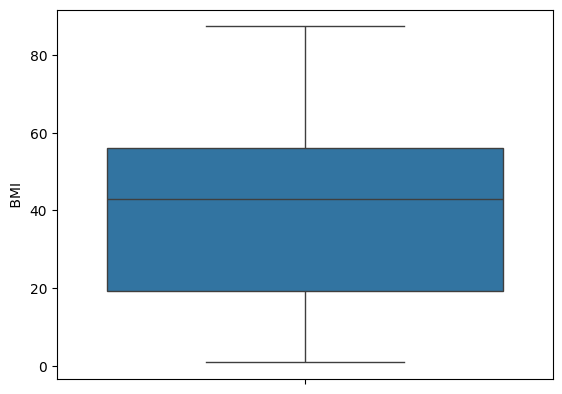

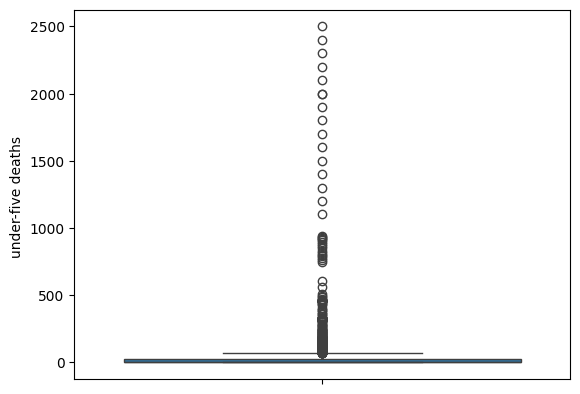

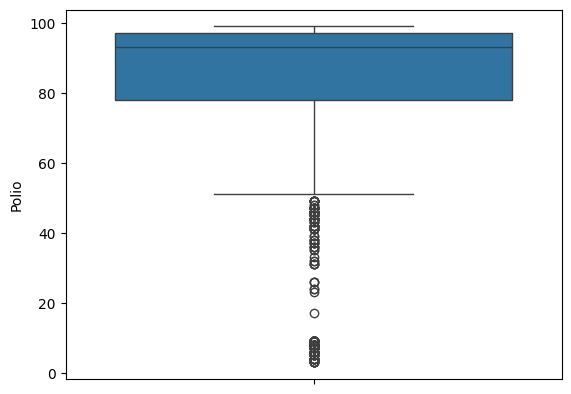

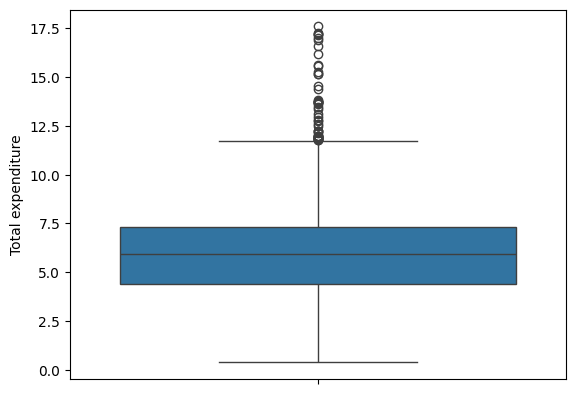

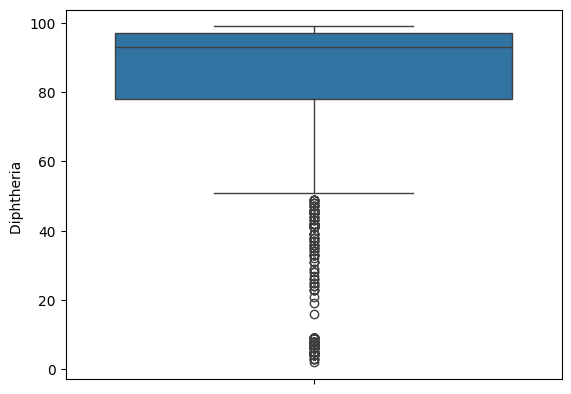

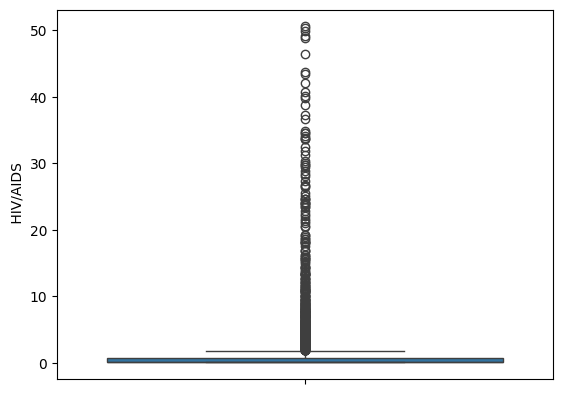

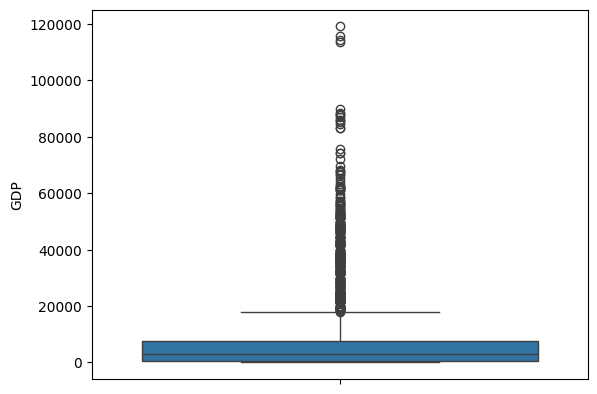

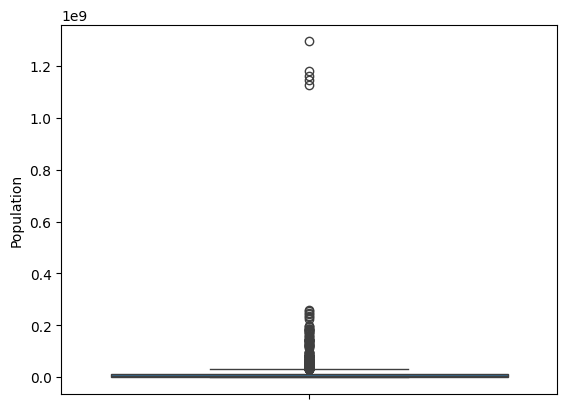

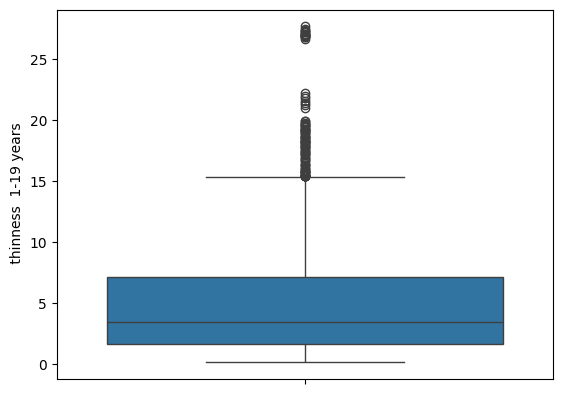

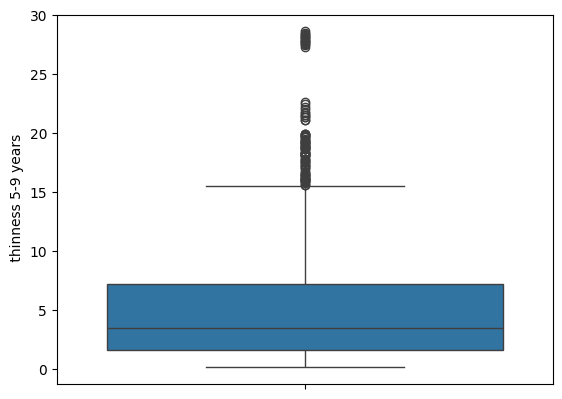

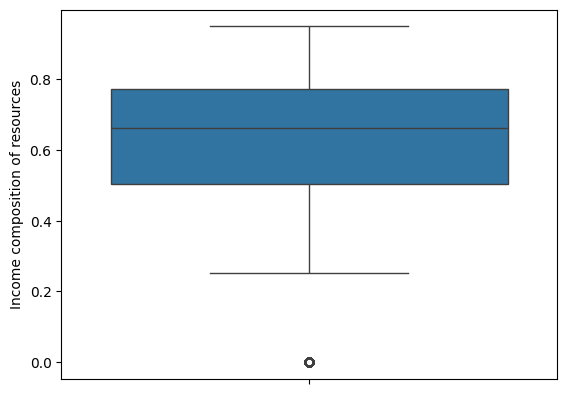

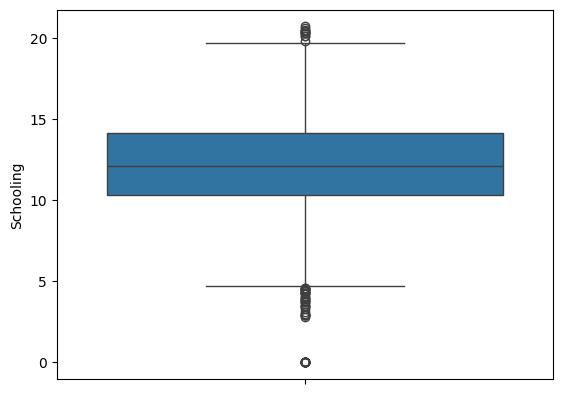

In [11]:
# Checking for Outliers
for x in df.columns:
  if df[x].dtype!='object':
    sns.boxplot(df[x])
    plt.show()

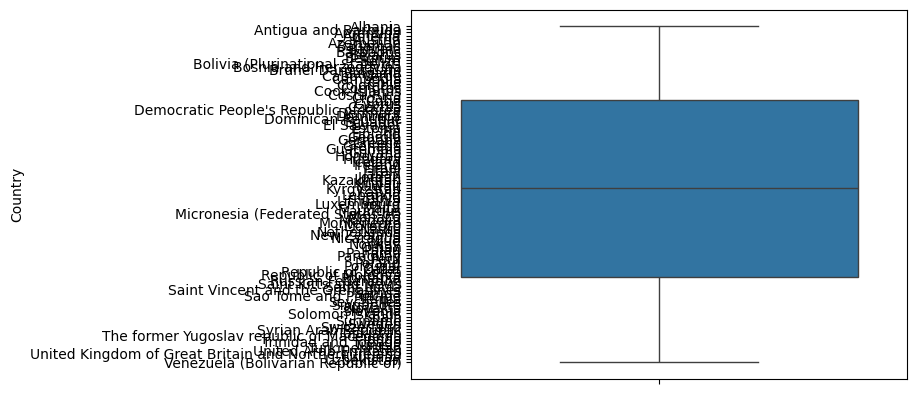

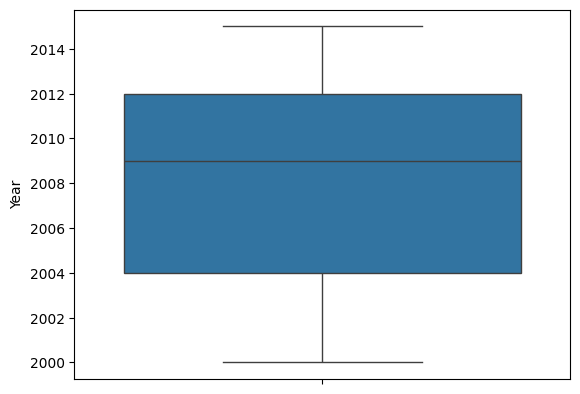

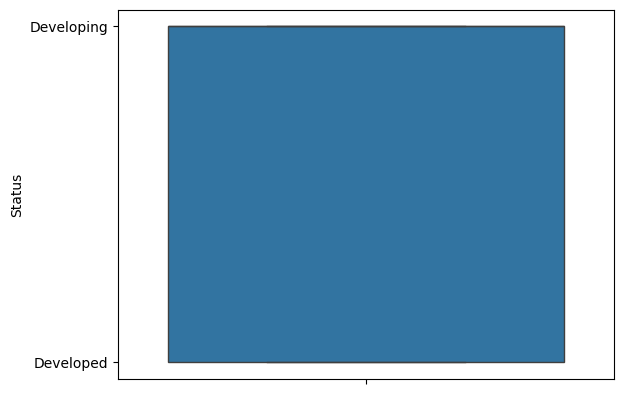

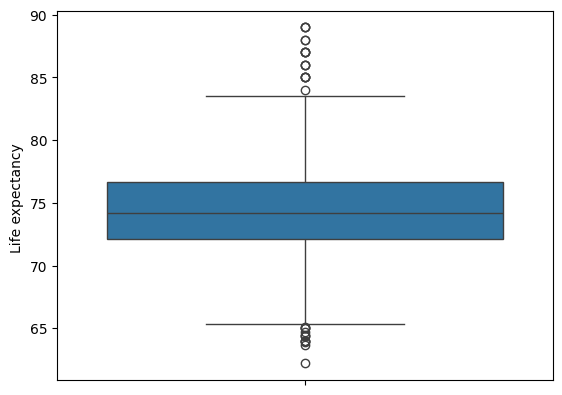

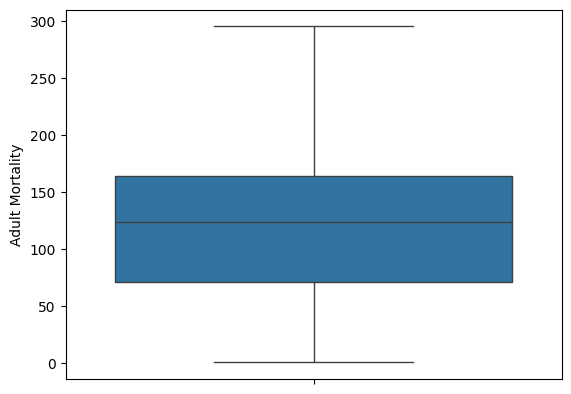

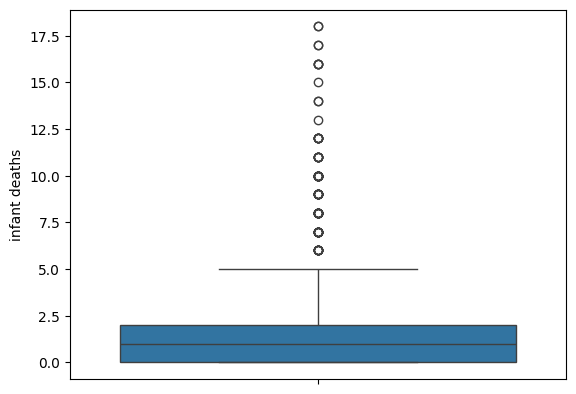

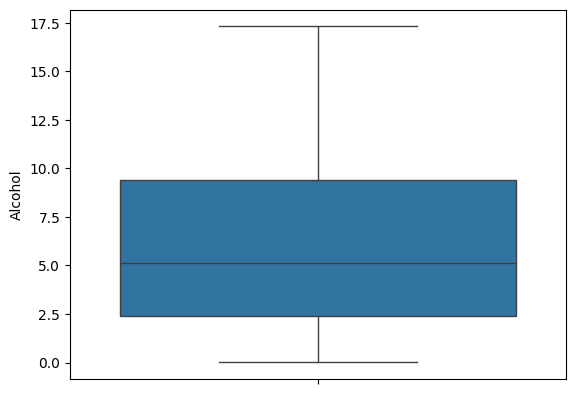

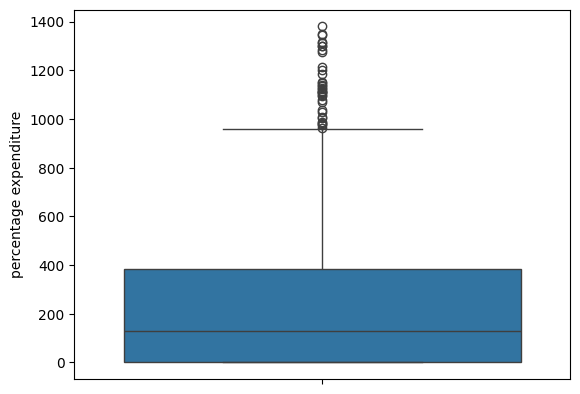

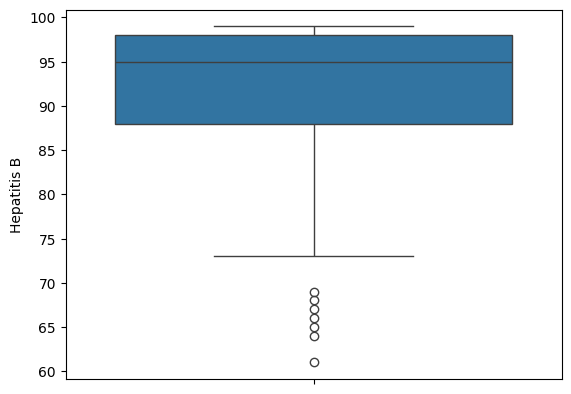

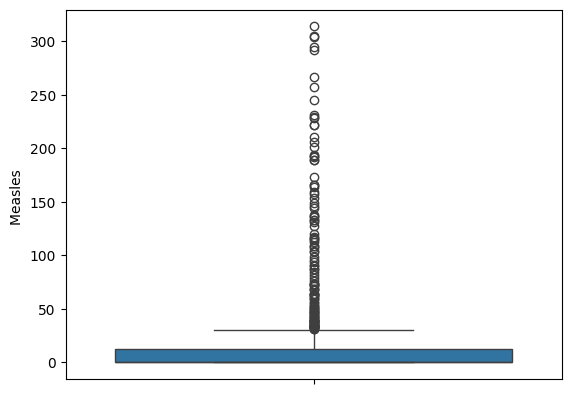

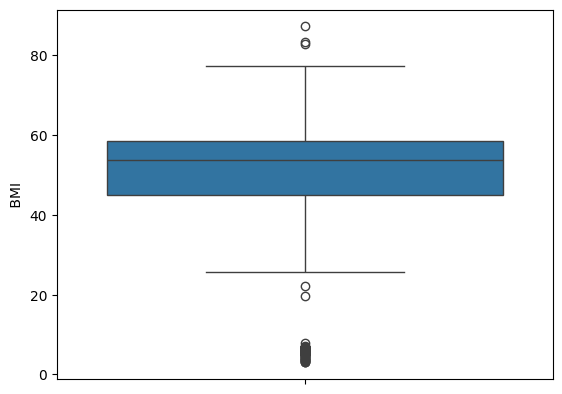

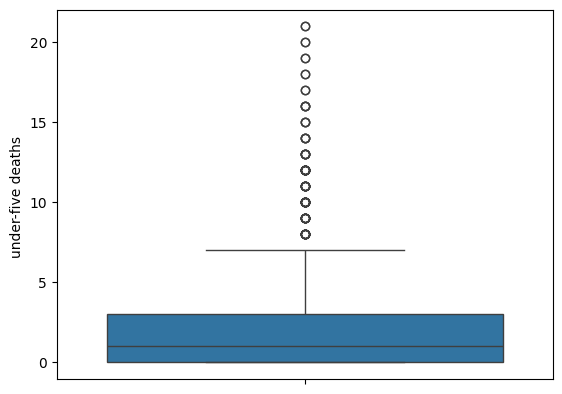

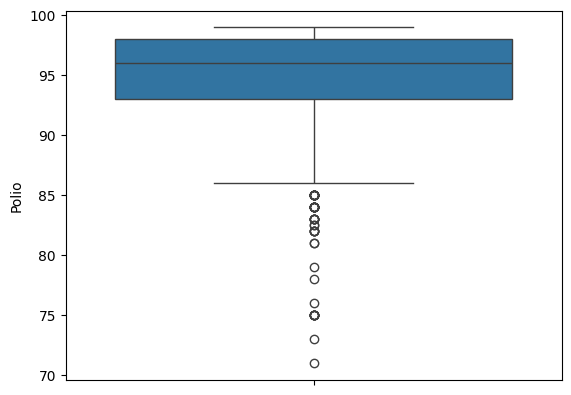

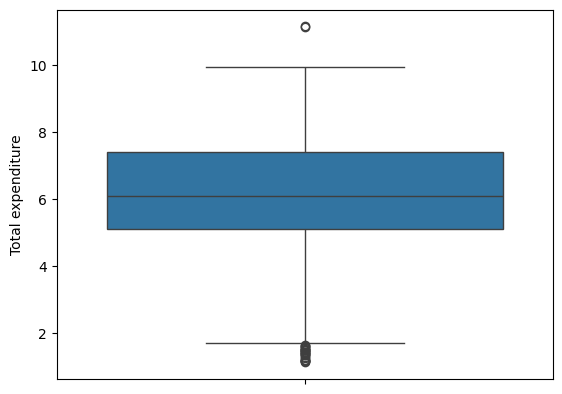

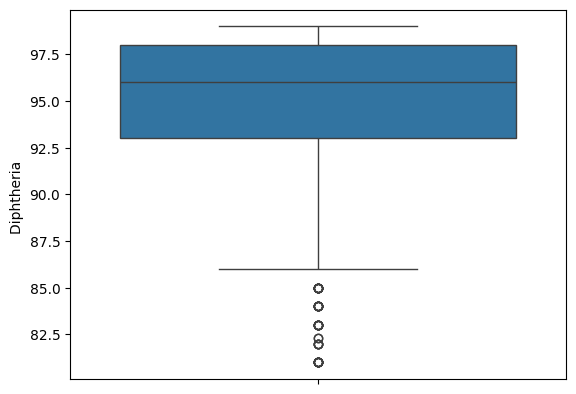

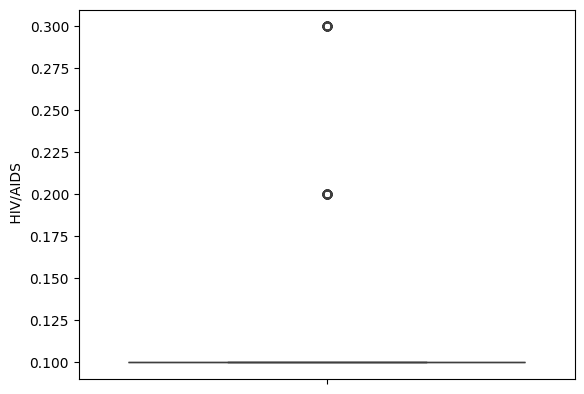

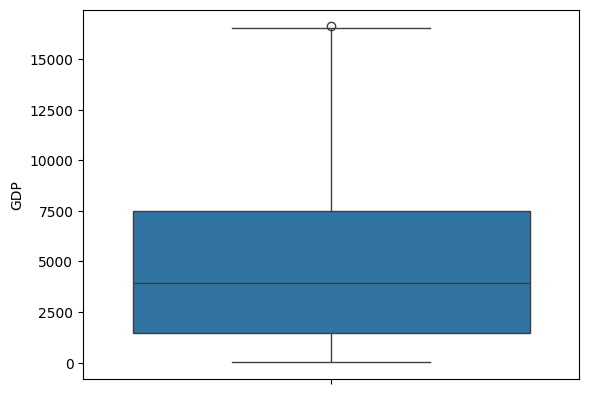

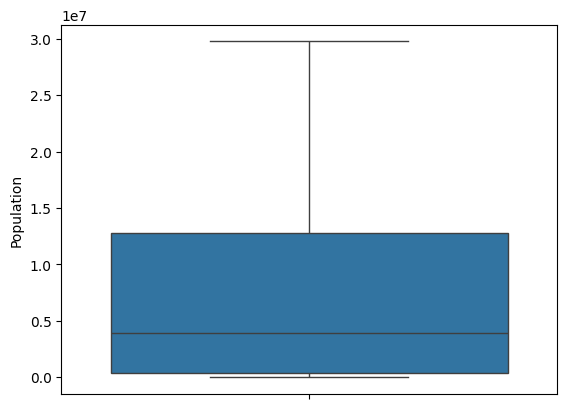

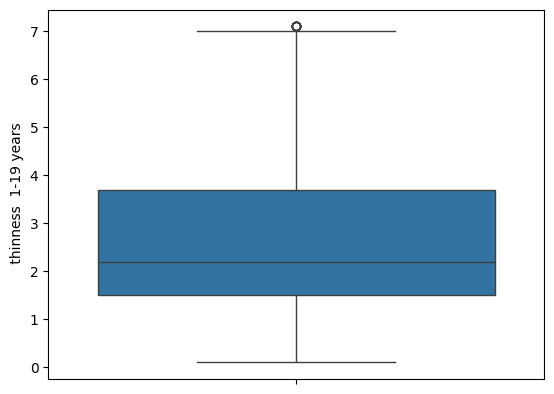

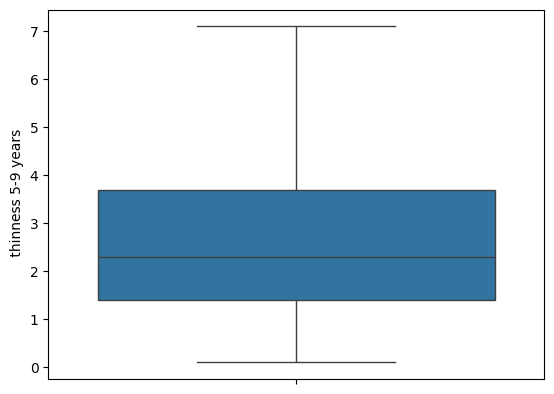

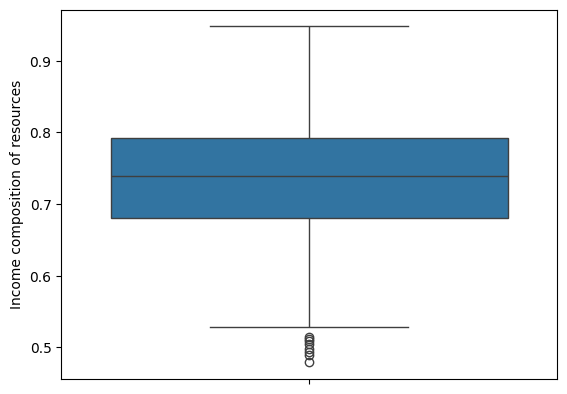

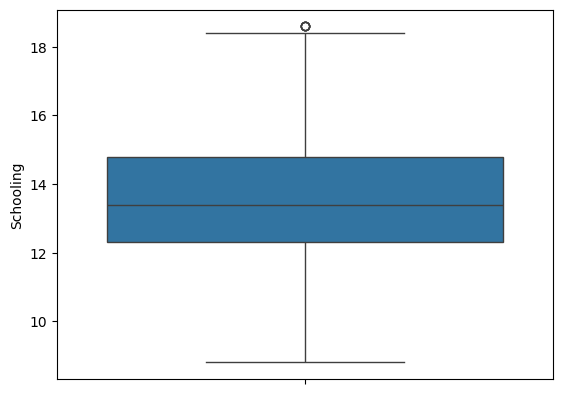

In [12]:
# Removing outliers
for x in df.columns:
  if df[x].dtype=='object':
    continue       #it will skip the object columns

  Q1=df[x].quantile(0.25)
  Q3=df[x].quantile(0.75)

  IQR=Q3-Q1
  lower_fence=Q1-1.5*IQR
  upper_fence=Q3+1.5*IQR
  df=df[(df[x]>=lower_fence) & (df[x]<=upper_fence)]

for x in df.columns:
  if df[x].dtype!='objec':
    sns.boxplot(df[x])
    plt.show()

**Variance Inflation Factor**
To check the dependency or the multicolinaerity in the data.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
col_list=[]
for x in df.columns:
  if df[x].dtype!='object':
    col_list.append(x)

col_list

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [15]:
# CALCULATING VARIANCE INFLATION FACTOR
dummy=df[col_list]
dummy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,2015,77.8,74.0,0,4.600000,364.975229,99.0,0,58.0,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
17,2014,77.5,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
18,2013,77.2,84.0,0,4.760000,430.876979,99.0,0,56.5,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,1.3,1.4,0.759,14.2
19,2012,76.9,86.0,0,5.140000,412.443356,99.0,9,55.8,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,1.3,1.4,0.752,14.2
20,2011,76.6,88.0,0,5.370000,437.062100,99.0,28,55.1,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2015,74.1,157.0,9,4.602861,0.000000,87.0,0,62.1,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.769,14.3
2860,2013,73.8,159.0,9,6.710000,0.000000,82.0,0,61.0,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.770,14.2
2861,2012,73.7,161.0,9,6.700000,0.000000,81.0,1,6.4,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.767,14.1
2864,2009,73.6,166.0,9,7.590000,0.000000,84.0,0,58.8,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.754,14.0


In [16]:
pd.DataFrame(dummy)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,2015,77.8,74.0,0,4.600000,364.975229,99.0,0,58.0,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
17,2014,77.5,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
18,2013,77.2,84.0,0,4.760000,430.876979,99.0,0,56.5,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,1.3,1.4,0.759,14.2
19,2012,76.9,86.0,0,5.140000,412.443356,99.0,9,55.8,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,1.3,1.4,0.752,14.2
20,2011,76.6,88.0,0,5.370000,437.062100,99.0,28,55.1,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2015,74.1,157.0,9,4.602861,0.000000,87.0,0,62.1,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.769,14.3
2860,2013,73.8,159.0,9,6.710000,0.000000,82.0,0,61.0,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.770,14.2
2861,2012,73.7,161.0,9,6.700000,0.000000,81.0,1,6.4,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.767,14.1
2864,2009,73.6,166.0,9,7.590000,0.000000,84.0,0,58.8,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.754,14.0


In [17]:
vif_data=pd.DataFrame()
vif_data['Feature']=dummy.columns
vif_data
vif_list=[]
for i in range(len(dummy.columns)):
  vif=variance_inflation_factor(dummy.values,i)
  vif_list.append(vif)

vif_data['VIF']=vif_list
vif_data

,Feature,VIF
0,Year,1273.581461
1,Life expectancy,766.505598
2,Adult Mortality,5.970555
3,infant deaths,117.935434
4,Alcohol,5.102965
5,percentage expenditure,2.152356
6,Hepatitis B,350.275706
7,Measles,1.251384
8,BMI,10.191493
9,under-five deaths,118.860997


In [18]:
df=df.drop(' thinness  1-19 years',axis=1)    # 2 columns have been dropped
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.600000,364.975229,99.0,0,...,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.510000,428.749067,98.0,0,...,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.760000,430.876979,99.0,0,...,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.140000,412.443356,99.0,9,...,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.370000,437.062100,99.0,28,...,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4.602861,0.000000,87.0,0,...,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,1.5,0.769,14.3
2860,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.710000,0.000000,82.0,0,...,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,1.5,0.770,14.2
2861,Venezuela (Bolivarian Republic of),2012,Developing,73.7,161.0,9,6.700000,0.000000,81.0,1,...,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,1.5,0.767,14.1
2864,Venezuela (Bolivarian Republic of),2009,Developing,73.6,166.0,9,7.590000,0.000000,84.0,0,...,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,1.5,0.754,14.0


In [19]:
df=df.drop(' thinness 5-9 years',axis=1)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.600000,364.975229,99.0,0,58.0,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.760000,430.876979,99.0,0,56.5,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.140000,412.443356,99.0,9,55.8,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.370000,437.062100,99.0,28,55.1,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4.602861,0.000000,87.0,0,62.1,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,0.769,14.3
2860,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.710000,0.000000,82.0,0,61.0,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,0.770,14.2
2861,Venezuela (Bolivarian Republic of),2012,Developing,73.7,161.0,9,6.700000,0.000000,81.0,1,6.4,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,0.767,14.1
2864,Venezuela (Bolivarian Republic of),2009,Developing,73.6,166.0,9,7.590000,0.000000,84.0,0,58.8,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,0.754,14.0


In [20]:
col_list = []
for x in df.columns:
  if df[x].dtype!='object' and x!='charges':
    col_list.append(x)

dummy = df[col_list] # Use the updated df to create the dummy DataFrame
vif_data= pd.DataFrame()
vif_data['Feature']= col_list
vif_data
vif_list = []
for i in range(len(dummy.columns)):
  vif = variance_inflation_factor(dummy.values,i)
  vif_list.append(vif)
vif_data['VIF']= vif_list

In [21]:
vif_data

,Feature,VIF
0,Year,1242.191197
1,Life expectancy,691.679726
2,Adult Mortality,5.857774
3,infant deaths,115.819984
4,Alcohol,4.384314
5,percentage expenditure,2.144003
6,Hepatitis B,342.638817
7,Measles,1.237407
8,BMI,9.771060
9,under-five deaths,116.487668


In [22]:
# Now converting object columns into numerical columns using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in df.columns:
  if df[x].dtype=='object':
    df[x]=le.fit_transform(df[x])

In [23]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
16,0,2015,1,77.8,74.0,0,4.600000,364.975229,99.0,0,58.0,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,0.762,14.2
17,0,2014,1,77.5,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,0.761,14.2
18,0,2013,1,77.2,84.0,0,4.760000,430.876979,99.0,0,56.5,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,0.759,14.2
19,0,2012,1,76.9,86.0,0,5.140000,412.443356,99.0,9,55.8,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,0.752,14.2
20,0,2011,1,76.6,88.0,0,5.370000,437.062100,99.0,28,55.1,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,110,2015,1,74.1,157.0,9,4.602861,0.000000,87.0,0,62.1,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,0.769,14.3
2860,110,2013,1,73.8,159.0,9,6.710000,0.000000,82.0,0,61.0,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,0.770,14.2
2861,110,2012,1,73.7,161.0,9,6.700000,0.000000,81.0,1,6.4,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,0.767,14.1
2864,110,2009,1,73.6,166.0,9,7.590000,0.000000,84.0,0,58.8,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,0.754,14.0


In [24]:
X = df.drop('Life expectancy ', axis=1)
Y = df['Life expectancy ']

In [25]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
16,0,2015,1,74.0,0,4.600000,364.975229,99.0,0,58.0,0,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,0.762,14.2
17,0,2014,1,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.88000,98.0,0.1,4575.763787,2.889140e+05,0.761,14.2
18,0,2013,1,84.0,0,4.760000,430.876979,99.0,0,56.5,1,99.0,5.66000,99.0,0.1,4414.723140,2.895920e+05,0.759,14.2
19,0,2012,1,86.0,0,5.140000,412.443356,99.0,9,55.8,1,99.0,5.59000,99.0,0.1,4247.614380,2.941000e+03,0.752,14.2
20,0,2011,1,88.0,0,5.370000,437.062100,99.0,28,55.1,1,99.0,5.71000,99.0,0.1,4437.178680,2.951950e+05,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,110,2015,1,157.0,9,4.602861,0.000000,87.0,0,62.1,10,87.0,5.93819,87.0,0.1,7483.158469,1.275338e+07,0.769,14.3
2860,110,2013,1,159.0,9,6.710000,0.000000,82.0,0,61.0,10,82.0,4.94000,82.0,0.1,7483.158469,1.275338e+07,0.770,14.2
2861,110,2012,1,161.0,9,6.700000,0.000000,81.0,1,6.4,10,73.0,4.80000,81.0,0.1,7483.158469,1.275338e+07,0.767,14.1
2864,110,2009,1,166.0,9,7.590000,0.000000,84.0,0,58.8,10,75.0,5.81000,84.0,0.1,7483.158469,1.275338e+07,0.754,14.0


In [26]:
Y

,Life expectancy
16,77.8
17,77.5
18,77.2
19,76.9
20,76.6
...,...
2858,74.1
2860,73.8
2861,73.7
2864,73.6


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [28]:
X_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
689,26,2015,0,86.0,0,4.602861,0.000000,97.000000,9,66.1,0,97.0,5.93819,97.0,0.1,7483.158469,1.275338e+07,0.627551,11.992793
382,14,2001,1,19.0,0,0.470000,1078.662440,99.000000,11,27.0,0,99.0,3.60000,97.0,0.1,16468.128860,1.275338e+07,0.819000,13.400000
2674,104,2006,1,12.0,3,1.460000,420.115354,99.000000,3,53.1,4,99.0,5.64000,99.0,0.1,3371.712310,1.196136e+06,0.689000,14.200000
2333,92,2011,0,122.0,0,10.240000,0.000000,99.000000,0,56.5,0,99.0,7.96000,99.0,0.1,7483.158469,1.275338e+07,0.829000,15.000000
166,6,2009,1,168.0,0,9.290000,0.000000,95.000000,0,6.7,0,97.0,7.43000,96.0,0.1,7483.158469,1.275338e+07,0.791000,12.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,7,2001,1,9.0,0,1.950000,1150.418063,99.000000,5,54.8,0,99.0,3.80000,99.0,0.1,12868.211000,1.275338e+07,0.794000,13.300000
259,11,2012,1,189.0,0,6.660000,582.802718,98.000000,0,48.5,0,98.0,5.45000,98.0,0.1,4673.638480,3.367100e+04,0.702000,12.500000
879,33,2002,1,211.0,0,11.480000,7.806043,80.940461,0,54.6,0,94.0,4.84000,94.0,0.1,538.347781,1.379350e+05,0.791000,15.400000
1537,57,2000,0,2.0,0,9.870000,373.260553,98.000000,19,56.9,0,92.0,6.46000,94.0,0.1,3297.354710,3.499536e+06,0.745000,14.000000


In [29]:
Y_train.shape

(630,)

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
Y_pred=lr.predict(X_test)
Y_pred

array([74.70845379, 81.44294483, 75.64625621, 72.1855612 , 80.13701236,
       73.74950013, 75.40229858, 73.0762204 , 77.00941379, 78.75452895,
       75.04709687, 75.05356332, 75.42360578, 73.6598021 , 74.76955753,
       75.20976523, 74.74713198, 71.53188889, 69.12197264, 74.62849575,
       80.52554581, 72.49059663, 78.77271236, 71.17881203, 74.12153114,
       72.39993888, 74.99836693, 72.84973019, 77.08896438, 72.9353521 ,
       72.75852144, 74.78954428, 71.21602937, 73.64358682, 78.82747082,
       72.73013286, 75.70983115, 74.5689964 , 72.75053075, 72.12421968,
       78.7300604 , 70.30244482, 68.1075228 , 69.19711958, 70.61329404,
       72.13510345, 68.64246151, 75.54916491, 70.66897149, 76.64949365,
       81.14030358, 74.33127647, 72.0147053 , 74.78196957, 77.37194689,
       71.28128271, 71.38513076, 75.48300129, 73.29897876, 67.34276331,
       75.82056434, 73.93000302, 72.93894955, 71.32153404, 73.3961934 ,
       72.45102483, 77.26559051, 80.56694672, 77.5200408 , 82.38

In [35]:
error=pd.DataFrame(columns=['Actual values','Predicted values'])
error

,Actual values,Predicted values


In [36]:
error['Actual values']= Y_test
error['Predicted values']= Y_pred
error

,Actual values,Predicted values
2092,87.0,74.708454
130,81.1,81.442945
690,78.6,75.646256
672,76.9,72.185561
740,80.0,80.137012
...,...,...
215,74.4,76.806742
399,71.1,72.608017
1250,81.4,79.400370
1916,89.0,82.333697


In [37]:
error ['Error rate'] = error['Actual values'] - error ['Predicted values']
error

,Actual values,Predicted values,Error rate
2092,87.0,74.708454,12.291546
130,81.1,81.442945,-0.342945
690,78.6,75.646256,2.953744
672,76.9,72.185561,4.714439
740,80.0,80.137012,-0.137012
...,...,...,...
215,74.4,76.806742,-2.406742
399,71.1,72.608017,-1.508017
1250,81.4,79.400370,1.999630
1916,89.0,82.333697,6.666303


In [38]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mse

9.215601822079574

In [39]:
rmse=np.sqrt(mse)
rmse

np.float64(3.0357209723687673)

In [41]:
r2_accuracy=r2_score(Y_test,Y_pred)
r2_accuracy*100

61.13823950817216